In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


## Univariate Visualizations
#### Distribution of categorical variable generation_id

In [3]:
# Use value_counts to count frequency of each unique value in Pandas series and sort in descending order.
# Then get the index values of returned series
gen_order = pokemon['generation_id'].value_counts().index

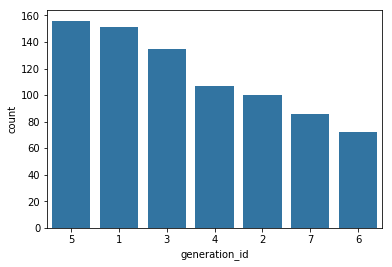

In [4]:
# Create bar chart for categorical data using seaborn function countplot
# Get only one color from color_palette
base_color = sb. color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

#### Distribution of categorical variable type_1

In [5]:
type1_order = pokemon['type_1'].value_counts().index

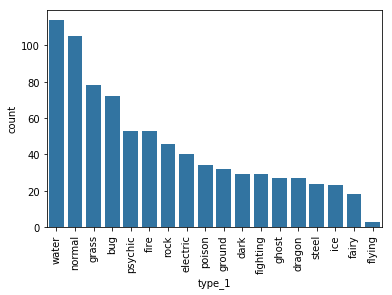

In [6]:
# Create bar chart
sb.countplot(data = pokemon, x = 'type_1', color = base_color, order = type1_order);
# Rotate the x labels
plt.xticks(rotation = 90);

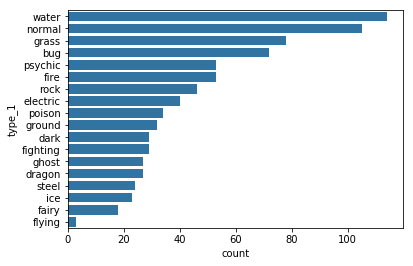

In [7]:
# Creat a horizontal bar chart instead as an alternative to deal with overlapping words
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type1_order);

#### Some data wrangling with melt

In [8]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                                     value_vars = ['type_1', 'type_2'],
                                     var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [9]:
type_order = pkmn_types['type'].value_counts().index
base_color = sb.color_palette()[0]

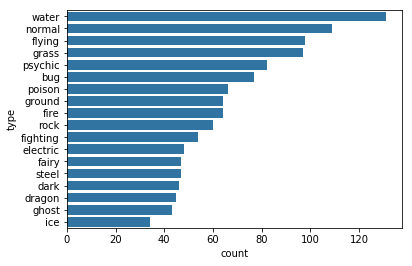

In [10]:
# Absolute frequency
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

#### Releative frequency with matplotlib

In [11]:
type_counts = pkmn_types['type'].value_counts()
# compute length of longest bar in terms of proportion
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [12]:
# generate values evenly spaced between 0 and max prop with say 2% spacing
ticks_prop = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in ticks_prop]

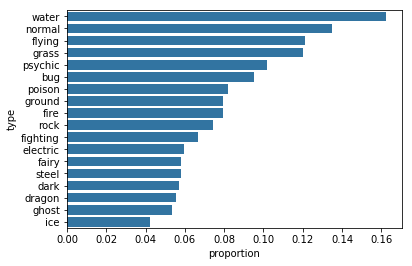

In [13]:
# Relative frequency
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xlabel('proportion')
plt.xticks(ticks_prop * n_pokemon, tick_names);

#### Have axis to show count and use text on bars to show proportion

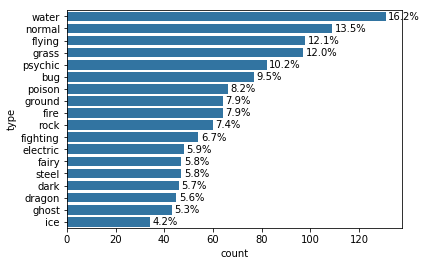

In [14]:
# this is where the flexibility of matplotlib can shine
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

# use a loop to place text elements one by one
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count / n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

#### Plotting missing value count per column

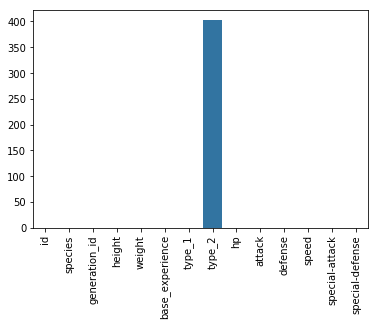

In [15]:
# accomplish this using barplot (useful function to keep in mind 
# if your data is summarized and you still want to build a bar chart)
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index, na_counts, color = base_color);
plt.xticks(rotation = 90);

#### plotting a pie chart

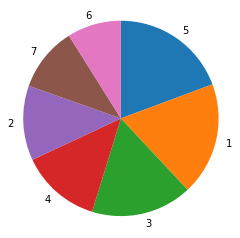

In [16]:
# use matplotlib's pie function. This function requires that the data be in a summarized form
sorted_data = pokemon['generation_id'].value_counts()
plt.pie(sorted_data, labels = sorted_data.index, startangle = 90, counterclock = False);
# to ensure the shape looks circular
plt.axis('square');

#### plotting an alternative donut plot

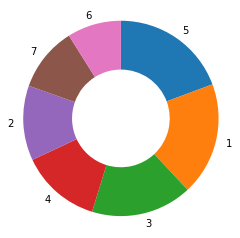

In [17]:
# setting the wedges' width property to less than 1 removes coloring from the center of the circle.
plt.pie(sorted_data, labels = sorted_data.index, startangle = 90, counterclock = False, wedgeprops = {'width': 0.5});
# to ensure the shape looks circular
plt.axis('square');

#### plotting histograms

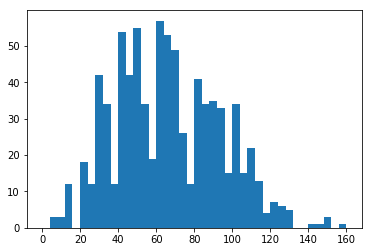

In [18]:
# using matplotlib's hist function
bins = np.arange(0, pokemon['speed'].max(0) + 4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

C:\Users\OYARO\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


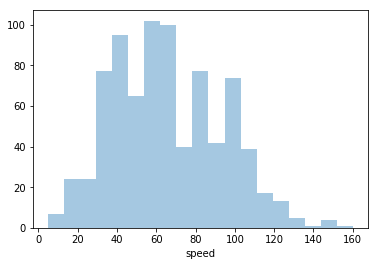

In [19]:
# using seaborn's distplot function
sb.distplot(pokemon['speed'], kde = False);

#### Choosing a histogram plot for discrete data 
Note: use this for small number of discrete values (since it can accomodate the spacing and alignment of edges), otherwise stick to the standard histogram plot.

In [20]:
# consider 100 random dice rolls
dice_rolls = np.random.randint(2, 13, size = 100)
dice_rolls

array([ 8, 10,  5,  3,  6,  3,  8, 10,  7,  4,  7,  5,  5,  7,  7, 11,  3,
       12,  5,  9, 12,  9,  9, 11, 11,  6, 12,  6,  4,  4,  3,  5, 10,  8,
        2,  5,  6, 11,  8,  4,  9,  3,  6,  9, 11,  2,  4,  3,  9,  8, 12,
       12, 10, 12,  9, 11,  7,  9,  2,  9,  7, 12,  3,  8, 11,  9,  2,  8,
        4,  9,  6, 11,  5, 11,  7, 12,  6,  7, 12,  8, 12,  2, 11, 10,  4,
       10,  9,  3, 10,  3,  4,  5, 11,  6,  8,  6,  3,  7, 10,  7])

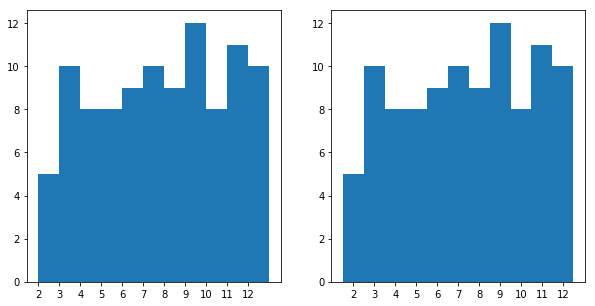

In [21]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(dice_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(dice_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

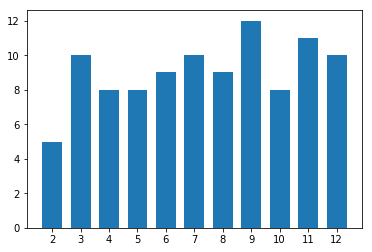

In [22]:
# As an additional step, consider if a histogram with non-connected bins might serve your purposes better.
# The "rwidth" parameter is used set the proportion of the bin widths that will be filled by each histogram bar.
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(dice_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

### Descriptive statistics, outliers and Axis Limits

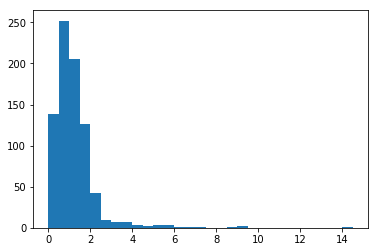

In [23]:
bins = np.arange(0,pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

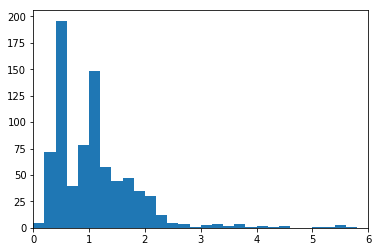

In [26]:
# The above data looks right skewed with very few points above 6
# Lets do a zoom in on the main bulk of the data
bins = np.arange(0,pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0,6));

### Scales and Transformations

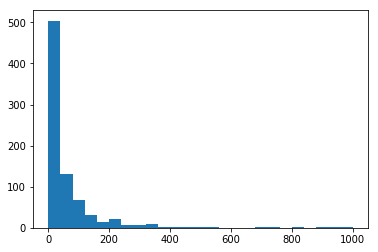

In [27]:
# Let's look at weight. Units are in terms of kgs
bins = np.arange(0,pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

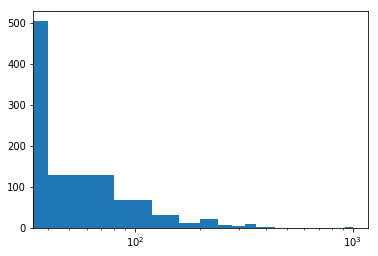

In [29]:
#apply scaling
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

In [35]:
# We need some adjustment above for more interpretability. First let's discuss the bins
np.log10(pokemon['weight']).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

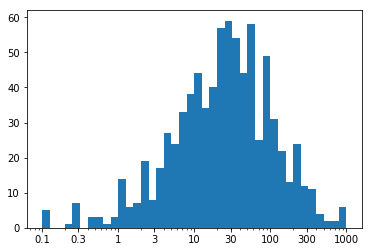

In [43]:
# Based on the descriptive data above, we can use as our bin limits [10^-1,10^3]
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
# Add some ticks as well
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ["{}".format(tick) for tick in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')
# It is important that the xticks are specified after xscale since that function has its own built-in tick settings.
plt.xticks(ticks, labels);